In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/interim/otodom_interim.csv', index_col=0)
df.drop('index', axis=1, inplace=True)
df.head()

,address,price,price_m2,area_m2,rooms,floor,parking,market,build_yr,building_type,elevator,heating_type,max_floor,balcony,backyard,terrace,building_age,district,street
0,"Gdynia, Pustki Cisowskie-Demptowo, Pustki Ciso...",530000.0,6625.0,80.00,4.0,3.0,0,wtórny,1981.0,blok,0.0,miejskie,3.0,1,0,0,41.0,Pustki Cisowskie-Demptowo,NaN
1,"Gdynia, Oksywie, ul. Benisławskiego",477037.0,10982.0,43.44,2.0,0.0,1,pierwotny,2023.0,NaN,1.0,NaN,11.0,1,0,0,-1.0,Oksywie,NaN
2,"Gdynia, Orłowo, Bernadowska",1600000.0,24375.0,65.64,3.0,0.0,0,wtórny,2018.0,NaN,0.0,NaN,2.0,0,0,0,4.0,Orłowo,NaN
3,"Gdynia, Orłowo, Bernadowska",3399000.0,34571.0,98.32,4.0,1.0,1,wtórny,2020.0,NaN,0.0,NaN,2.0,1,0,0,2.0,Orłowo,NaN
4,"Gdynia, Pogórze",522950.0,8900.0,58.76,3.0,1.0,1,wtórny,2022.0,apartamentowiec,1.0,miejskie,3.0,1,0,0,0.0,Pogórze,NaN


In [3]:
df.describe()

,price,price_m2,area_m2,rooms,floor,parking,build_yr,elevator,max_floor,balcony,backyard,terrace,building_age
count,1.753000e+03,1753.000000,1753.000000,1751.000000,1737.000000,1753.000000,1519.000000,1753.000000,1704.000000,1753.000000,1753.000000,1753.000000,1519.000000
mean,8.436831e+05,12696.556189,64.435220,2.816105,2.377950,0.524815,1996.148124,0.438677,5.071009,0.544210,0.115231,0.146606,25.851876
std,6.808962e+05,5613.125490,30.839518,0.938931,2.231378,0.499526,64.147884,0.496367,4.232692,0.498184,0.319392,0.353813,64.147884
min,4.800000e+04,3200.000000,15.000000,1.000000,-0.500000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-999.000000
25%,4.690000e+05,9259.000000,45.600000,2.000000,1.000000,0.000000,1976.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,6.200000e+05,11200.000000,58.790000,3.000000,2.000000,1.000000,2009.000000,0.000000,4.000000,1.000000,0.000000,0.000000,13.000000
75%,9.500000e+05,14300.000000,75.610000,3.000000,3.000000,1.000000,2021.000000,1.000000,5.000000,1.000000,0.000000,0.000000,46.000000
max,5.999000e+06,82569.000000,500.000000,7.000000,10.000000,1.000000,3021.000000,1.000000,34.000000,1.000000,1.000000,1.000000,2021.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        1750 non-null   object 
 1   price          1753 non-null   float64
 2   price_m2       1753 non-null   float64
 3   area_m2        1753 non-null   float64
 4   rooms          1751 non-null   float64
 5   floor          1737 non-null   float64
 6   parking        1753 non-null   int64  
 7   market         1753 non-null   object 
 8   build_yr       1519 non-null   float64
 9   building_type  1346 non-null   object 
 10  elevator       1753 non-null   float64
 11  heating_type   1283 non-null   object 
 12  max_floor      1704 non-null   float64
 13  balcony        1753 non-null   int64  
 14  backyard       1753 non-null   int64  
 15  terrace        1753 non-null   int64  
 16  building_age   1519 non-null   float64
 17  district       1713 non-null   object 
 18  street  

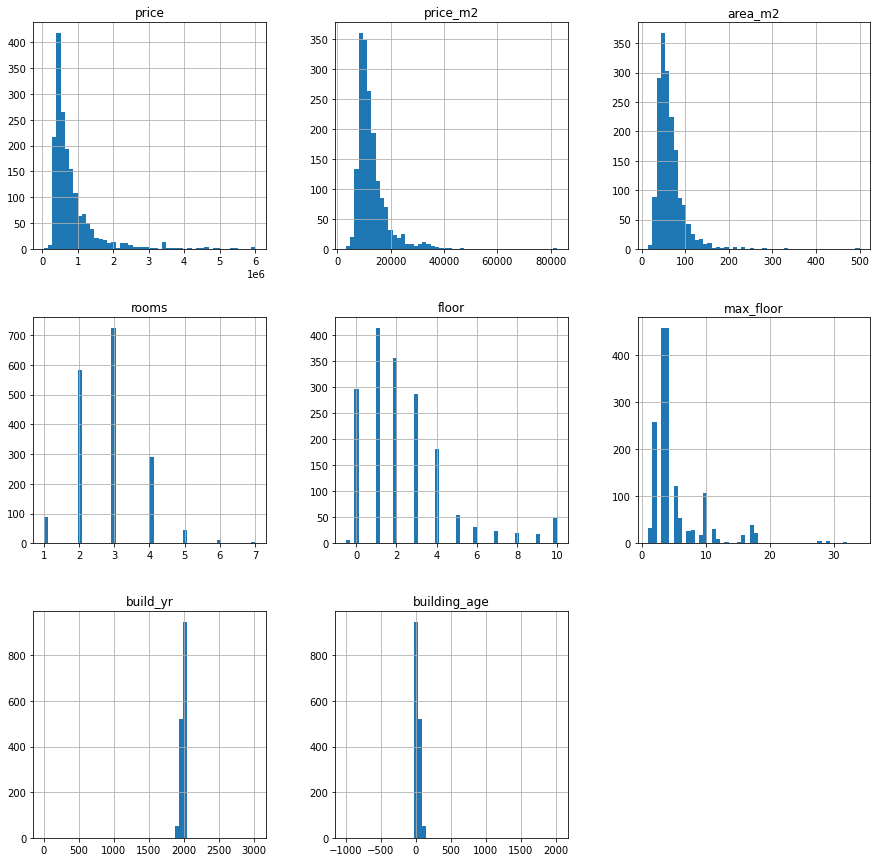

In [5]:
num_vars = ['price', 'price_m2', 'area_m2', 'rooms', 'floor', 'max_floor', 'build_yr', 'building_age']

df[num_vars].hist(figsize=(15,15), bins=50)
plt.show()

NOTE:  

price / price_m2 / area_m2 / floor / max_floor - tail heavy  
build_yr / building_age - outliers

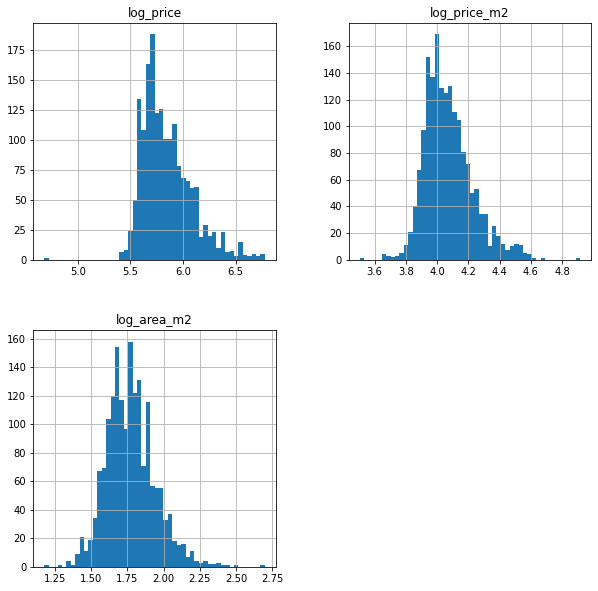

In [6]:
log_num_vars = []
for var in ['price', 'price_m2', 'area_m2']:
    new_column = "log_" + var
    df[new_column] = np.log10(df[var])
    log_num_vars.append(new_column)

df[log_num_vars].hist(figsize=(10,10), bins=50)
plt.show()

<AxesSubplot:>

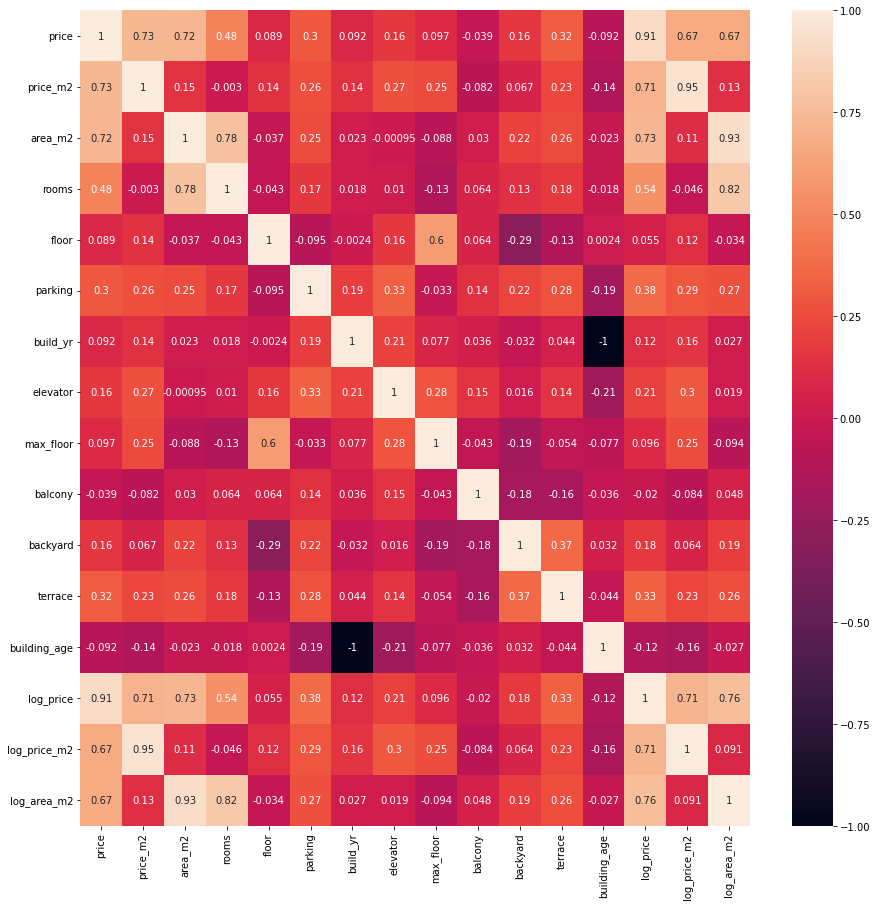

In [7]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [8]:
df['district'].value_counts()

Śródmieście                  278
Wzgórze Św. Maksymiliana     118
Mały Kack                    113
Redłowo                      107
Oksywie                      103
Chwarzno-Wiczlino            102
Pogórze                       97
Orłowo                        95
Chylonia                      93
Grabówek                      83
Witomino                      63
Dąbrowa                       62
Obłuże                        61
Działki Leśne                 60
Karwiny                       58
Leszczynki                    49
Gdynia                        48
Wielki Kack                   43
Cisowa                        30
Kamienna Góra                 23
Pustki Cisowskie-Demptowo     20
Babie Doły                     7
Name: district, dtype: int64

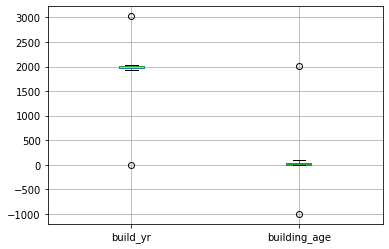

In [9]:
df.boxplot(column = ['build_yr', 'building_age'])
plt.show()

fun fact:  
Gdynia got a city rights at 10 February 1926

<AxesSubplot:>

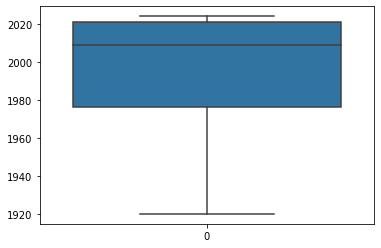

In [10]:
df.build_yr = df.build_yr.apply(lambda x: x if x > 1500 and x < 2050 else np.nan) 
sns.boxplot(data=df['build_yr'])

<AxesSubplot:>

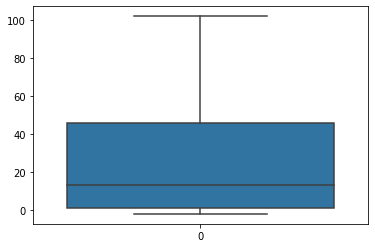

In [11]:
df.building_age = df.building_age.apply(lambda x: x if x > -10 and x < 1500 else np.nan)
sns.boxplot(data=df['building_age'])

In [12]:
# building for sale with build date from the future 
df[df.building_age < 0]

,address,price,price_m2,area_m2,rooms,floor,parking,market,build_yr,building_type,...,max_floor,balcony,backyard,terrace,building_age,district,street,log_price,log_price_m2,log_area_m2
1,"Gdynia, Oksywie, ul. Benisławskiego",477037.0,10982.0,43.44,2.0,0.0,1,pierwotny,2023.0,NaN,...,11.0,1,0,0,-1.0,Oksywie,NaN,5.678552,4.040681,1.637890
134,"Gdynia, Wielki Kack, ul. Nowodworcowa",379000.0,9444.0,40.13,2.0,2.0,1,pierwotny,2024.0,apartamentowiec,...,3.0,1,0,0,-2.0,Wielki Kack,NaN,5.578639,3.975156,1.603469
135,"Gdynia, Chwarzno-Wiczlino, Wiczlino, ul. Jachtowa",699000.0,5197.0,134.50,4.0,1.0,1,pierwotny,2023.0,szeregowiec,...,2.0,1,1,0,-1.0,Chwarzno-Wiczlino,NaN,5.844477,3.715753,2.128722
160,"Gdynia, Śródmieście",514855.0,19495.0,26.41,1.0,2.0,0,pierwotny,2023.0,blok,...,4.0,1,0,0,-1.0,Śródmieście,NaN,5.711685,4.289923,1.421768
161,"Gdynia, Śródmieście",999350.0,18863.0,52.98,3.0,0.0,1,pierwotny,2023.0,blok,...,4.0,0,1,1,-1.0,Śródmieście,NaN,5.999718,4.275611,1.724112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,"Gdynia, Pogórze, Różewicza",384753.0,9350.0,41.15,2.0,0.0,0,pierwotny,2023.0,blok,...,2.0,0,0,0,-1.0,Pogórze,NaN,5.585182,3.970812,1.614370
1614,"Gdynia, Pogórze, Różewicza",486559.0,8630.0,56.38,3.0,1.0,0,pierwotny,2023.0,blok,...,2.0,0,0,0,-1.0,Pogórze,NaN,5.687136,3.936011,1.751125
1615,"Gdynia, Pogórze, Różewicza",429015.0,9250.0,46.38,2.0,0.0,0,pierwotny,2023.0,blok,...,2.0,0,0,0,-1.0,Pogórze,NaN,5.632472,3.966142,1.666331
1681,"Gdynia, Wzgórze Św. Maksymiliana, ul. Gabriela...",791436.0,20200.0,39.18,2.0,1.0,1,pierwotny,2023.0,apartamentowiec,...,2.0,1,0,0,-1.0,Wzgórze Św. Maksymiliana,NaN,5.898416,4.305351,1.593064


<AxesSubplot:>

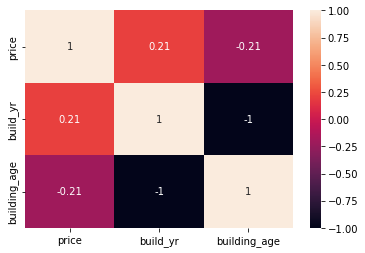

In [13]:
sns.heatmap(df[['price', 'build_yr', 'building_age']].corr(), annot=True)

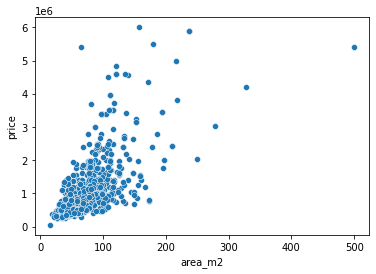

In [14]:
sns.scatterplot(data=df, x='area_m2' , y='price')
plt.show()

In [15]:
df.price.loc[df.price > 1_000_000]

2       1600000.0
3       3399000.0
13      1589000.0
19      1950000.0
20      1799000.0
          ...    
1745    3140000.0
1746    1850000.0
1748    2200000.0
1749    1126368.0
1750    4840000.0
Name: price, Length: 387, dtype: float64

In [16]:
df.price.sort_values(ascending=False).head(10)

1599    5999000.0
329     5900000.0
317     5900000.0
723     5900000.0
320     5500000.0
316     5400000.0
1578    5400000.0
39      5000000.0
1750    4840000.0
1322    4606470.0
Name: price, dtype: float64

NOTE: 

I checked in otodom.pl and there is for real 8 apartments for over 5 mln pln ! no mistakes here

In [17]:
df.price.sort_values().head()

1390     48000.0
343     250000.0
68      250000.0
1289    255000.0
98      259000.0
Name: price, dtype: float64

NOTE:  
Also apartemnt with 48_000pln pricetag is also real. 15m2 for seniors / rentist

In [18]:
df_gr = df.groupby('district').mean()
df_gr

,price,price_m2,area_m2,rooms,floor,parking,build_yr,elevator,max_floor,balcony,backyard,terrace,building_age,log_price,log_price_m2,log_area_m2
district,,,,,,,,,,,,,,,,
Babie Doły,5.480000e+05,10053.571429,56.635714,2.571429,2.000000,0.428571,1978.166667,0.000000,3.428571,0.714286,0.000000,0.142857,43.833333,5.728018,3.988547,1.739470
Chwarzno-Wiczlino,8.236525e+05,11114.333333,75.811471,3.284314,1.475248,0.666667,2015.453608,0.558824,3.070000,0.617647,0.117647,0.264706,6.546392,5.898965,4.038320,1.860647
Chylonia,4.481598e+05,9292.806452,48.923871,2.483871,2.611111,0.290323,1980.630137,0.225806,5.685393,0.623656,0.043011,0.032258,41.369863,5.639233,3.962591,1.676642
Cisowa,4.933833e+05,8898.533333,56.203333,3.033333,3.466667,0.366667,1985.045455,0.533333,7.066667,0.633333,0.033333,0.066667,36.954545,5.681129,3.942946,1.738181
Działki Leśne,8.776798e+05,13271.150000,64.339333,2.683333,1.853448,0.483333,1983.043478,0.283333,3.625000,0.466667,0.100000,0.133333,38.956522,5.878015,4.105607,1.772409
Dąbrowa,6.424334e+05,9563.500000,69.636290,2.758065,1.693548,0.532258,2004.923077,0.274194,3.245902,0.677419,0.161290,0.096774,17.076923,5.765364,3.970510,1.794854
Gdynia,8.042454e+05,11835.937500,66.310000,2.958333,2.958333,0.479167,1993.657895,0.416667,6.382979,0.520833,0.145833,0.125000,28.342105,5.849777,4.051671,1.798108
Grabówek,4.959482e+05,9141.361446,56.140602,2.433735,2.228916,0.325301,1962.283784,0.048193,3.927711,0.385542,0.024096,0.036145,59.716216,5.681681,3.953084,1.728597
Kamienna Góra,1.830826e+06,21072.521739,84.102174,3.347826,1.826087,0.739130,1992.350000,0.608696,4.173913,0.434783,0.217391,0.391304,29.650000,6.155071,4.298666,1.856405


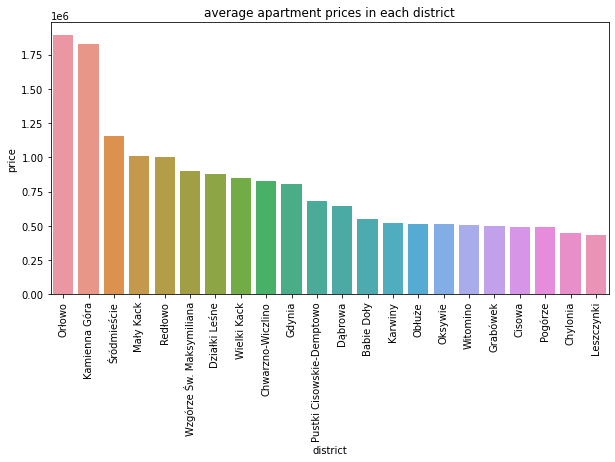

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_gr.index, y=df_gr.price, order=df_gr.price.sort_values(ascending=False).index)
plt.title("average apartment prices in each district")
plt.xticks(rotation=90)
plt.show()

Let's check if high prices are related with high apartment area

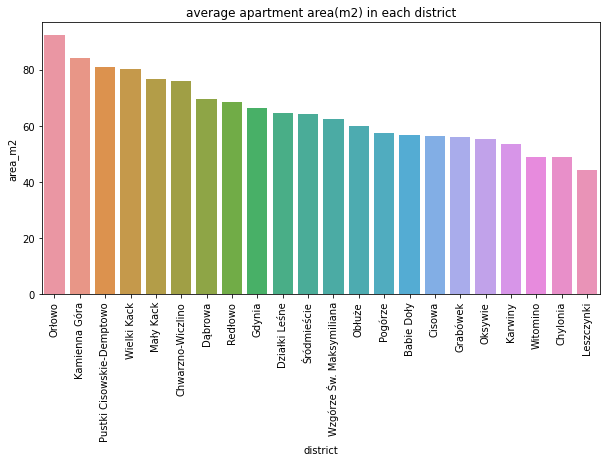

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_gr.index, y=df_gr.area_m2, order=df_gr.area_m2.sort_values(ascending=False).index)
plt.title("average apartment area(m2) in each district")
plt.xticks(rotation=90)
plt.show()

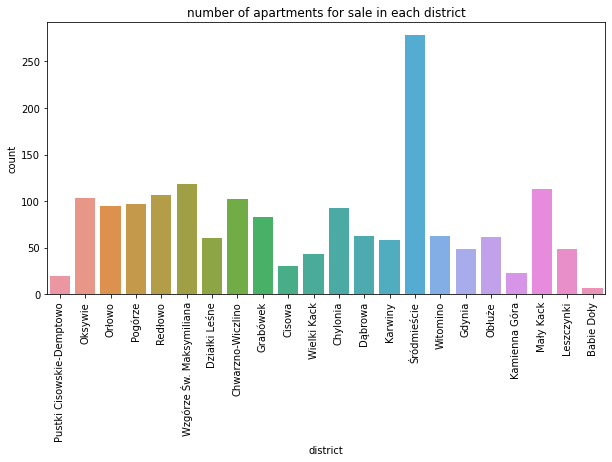

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x= "district")
plt.title("number of apartments for sale in each district")
plt.xticks(rotation=90)
plt.show()

In [22]:
sr_age = df.loc[(df.district=='Śródmieście') & (~df.building_age.isna()), 'building_age'].sort_values()

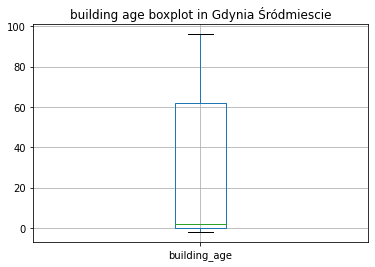

In [23]:
df.loc[(df.district=='Śródmieście') & (~df.building_age.isna())].boxplot(column='building_age')
plt.title("building age boxplot in Gdynia Śródmiescie")
plt.show()

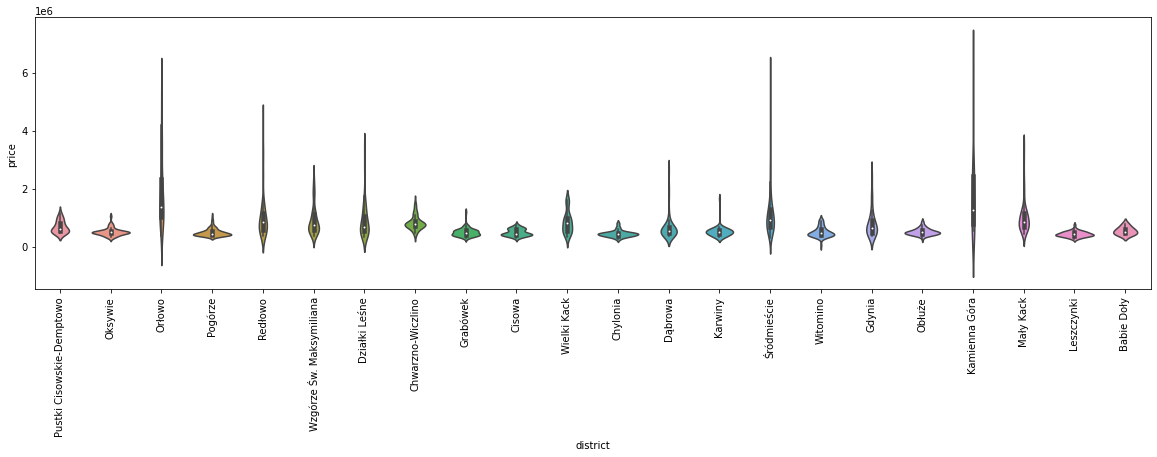

In [24]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df, x='district', y='price')
plt.xticks(rotation=90)
plt.show()

## try to get some district information based on street by hand

In this example only for 6 streets - rest will be replaced with nan.

with nan values I will deal in pipeline later (imputer)

In [25]:
df.loc[df.district== "Gdynia"].head()

,address,price,price_m2,area_m2,rooms,floor,parking,market,build_yr,building_type,...,max_floor,balcony,backyard,terrace,building_age,district,street,log_price,log_price_m2,log_area_m2
32,"Śląska, Gdynia, pomorskie",620000.00,9147.0,67.78,3.0,2.0,1,wtórny,1959.0,blok,...,4.0,0,0,0,63.0,Gdynia,Śląska,5.792392,3.961279,1.831102
92,"ul. Morska, Gdynia, pomorskie",455000.00,7818.0,58.20,3.0,4.0,0,wtórny,NaN,kamienica,...,4.0,0,0,0,NaN,Gdynia,ul. Morska,5.658011,3.893096,1.764923
99,"Morska, Gdynia, pomorskie",949900.00,11815.0,80.40,3.0,2.0,1,wtórny,NaN,kamienica,...,4.0,1,0,0,NaN,Gdynia,Morska,5.977678,4.072434,1.905256
103,"ul. Kazimierza Górskiego, Gdynia, pomorskie",572834.66,12129.0,47.23,2.0,5.0,0,pierwotny,2021.0,apartamentowiec,...,16.0,0,0,0,1.0,Gdynia,ul. Kazimierza Górskiego,5.758029,4.083825,1.674218
163,"Zwinisławy, Gdynia, pomorskie",699000.00,8214.0,85.10,3.0,3.0,1,wtórny,NaN,NaN,...,3.0,1,0,0,NaN,Gdynia,Zwinisławy,5.844477,3.914555,1.929930


In [26]:
df.loc[df.district== "Gdynia", 'street'].unique()

array(['Śląska', 'ul. Morska', 'Morska', 'ul. Kazimierza Górskiego',
       'Zwinisławy', 'Stoigniewa', 'ul. Mała', 'ul. Helska', 'Młyńska',
       'Strzelców', 'ul. Kazimierza Górskiego 1',
       'gen. Mariusza Zaruskiego', 'Mikołaja Kopernika', 'Ogrody Tesoro',
       'Aleja Iberyjska', 'ul. Bronisława Dembińskiego', 'Wiejska',
       'ul. Zygmuntowska', 'Bronisława Dembińskiego', 'Gojawiczyńskiej',
       'Gryfa Pomorskiego', 'Zygmuntowska', 'Przebendowskich',
       'Leopolda Staffa', 'Witosławy', 'Olsztyńska',
       'kadm. Włodzimierza Brunona Steyera', 'Jantarowa',
       'Elizy Orzeszkowej', '3 Maja', 'Wejherowska', 'Sucharskiego',
       'Zwycięstwa', 'Sopocka', 'Starowiejska', 'Waleriana Szefki',
       'Małokacka', 'Żeliwna', 'Kcyńska', 'Kiejstuta', 'Orłowska'],
      dtype=object)

In [27]:
df["street"].value_counts().head(6)

ul. Kazimierza Górskiego    6
Zwycięstwa                  2
Przebendowskich             2
Kiejstuta                   1
Kcyńska                     1
Leopolda Staffa             1
Name: street, dtype: int64

In [28]:
df['street'] = df.loc[df.district== "Gdynia", 'street'].apply(lambda x: x.replace('ul. ','').strip())

In [29]:
steet_district = {
    "górskiego": "Wzgórze Św. Maksymiliana",
    "przebendowskich": "Orłowo",
    "dembińskiego": "Grabówek",
    "morska": "Chylonia",
    "zygmuntowska": "Śródmieście",
    "zwycięstwa": "Orłowo"
}

for street, district in steet_district.items():
    df.loc[(~df.street.isna())&(df.street.str.lower().str.contains(street)), 'district'] = district

In [30]:
df.loc[df.district == "Gdynia", "district"] = np.nan

In [31]:
df.district.unique()

array(['Pustki Cisowskie-Demptowo', 'Oksywie', 'Orłowo', 'Pogórze',
       'Redłowo', 'Wzgórze Św. Maksymiliana', 'Działki Leśne',
       'Chwarzno-Wiczlino', 'Grabówek', 'Cisowa', 'Wielki Kack',
       'Chylonia', 'Dąbrowa', 'Karwiny', 'Śródmieście', 'Witomino', nan,
       'Obłuże', 'Kamienna Góra', 'Mały Kack', 'Leszczynki', 'Babie Doły'],
      dtype=object)

In [32]:
df.columns

Index(['address', 'price', 'price_m2', 'area_m2', 'rooms', 'floor', 'parking',
       'market', 'build_yr', 'building_type', 'elevator', 'heating_type',
       'max_floor', 'balcony', 'backyard', 'terrace', 'building_age',
       'district', 'street', 'log_price', 'log_price_m2', 'log_area_m2'],
      dtype='object')

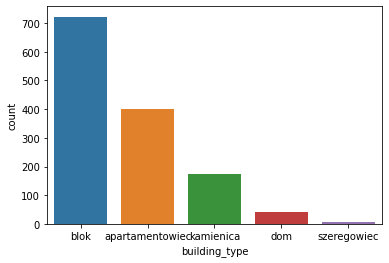

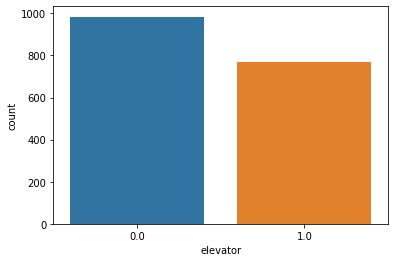

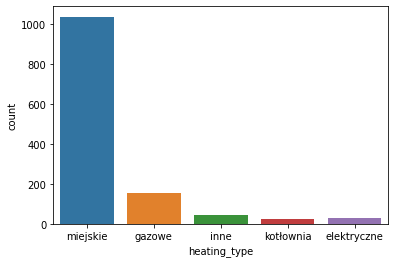

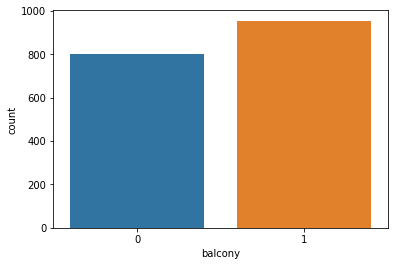

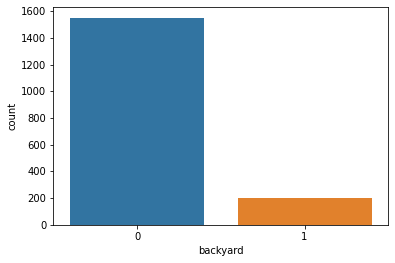

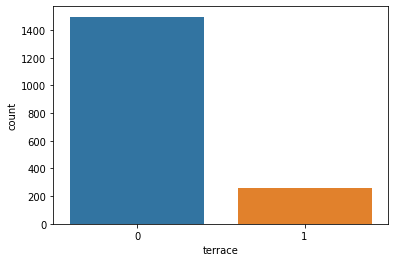

In [33]:
perks = ['building_type', 'elevator', 'heating_type', 'balcony', 'backyard', 'terrace']
for perk in perks:
    sns.countplot(data=df, x=perk)
    plt.show()

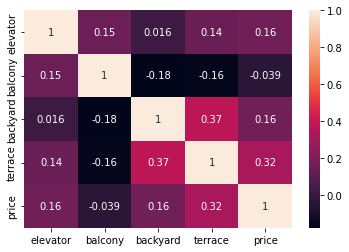

In [34]:
perks_ = perks + ['price']
sns.heatmap(df[perks_].corr(), annot=True)
plt.show()

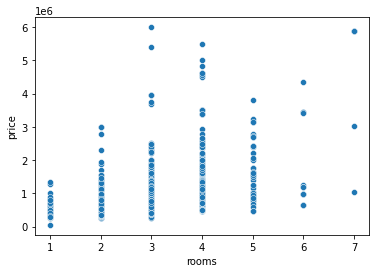

,price,rooms
price,1.000000,0.477521
rooms,0.477521,1.000000


In [35]:
sns.scatterplot(data=df, x='rooms', y='price')
plt.show()
df[['price','rooms']].corr()

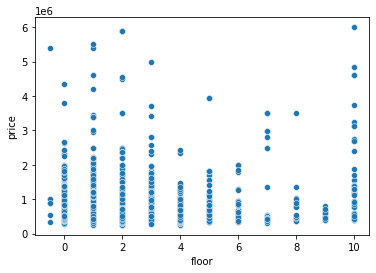

,price,floor,max_floor
price,1.000000,0.089305,0.096643
floor,0.089305,1.000000,0.598864
max_floor,0.096643,0.598864,1.000000


In [36]:
sns.scatterplot(data=df, x='floor', y='price')
plt.show()
df[['price','floor', 'max_floor']].corr()

In [37]:
is_nan = df.isna()
row_with_nan = is_nan.any(axis=1)
rows_with_nan = df[row_with_nan]
rows_with_nan

,address,price,price_m2,area_m2,rooms,floor,parking,market,build_yr,building_type,...,max_floor,balcony,backyard,terrace,building_age,district,street,log_price,log_price_m2,log_area_m2
0,"Gdynia, Pustki Cisowskie-Demptowo, Pustki Ciso...",530000.0,6625.0,80.00,4.0,3.0,0,wtórny,1981.0,blok,...,3.0,1,0,0,41.0,Pustki Cisowskie-Demptowo,NaN,5.724276,3.821186,1.903090
1,"Gdynia, Oksywie, ul. Benisławskiego",477037.0,10982.0,43.44,2.0,0.0,1,pierwotny,2023.0,NaN,...,11.0,1,0,0,-1.0,Oksywie,NaN,5.678552,4.040681,1.637890
2,"Gdynia, Orłowo, Bernadowska",1600000.0,24375.0,65.64,3.0,0.0,0,wtórny,2018.0,NaN,...,2.0,0,0,0,4.0,Orłowo,NaN,6.204120,4.386945,1.817169
3,"Gdynia, Orłowo, Bernadowska",3399000.0,34571.0,98.32,4.0,1.0,1,wtórny,2020.0,NaN,...,2.0,1,0,0,2.0,Orłowo,NaN,6.531351,4.538712,1.992642
4,"Gdynia, Pogórze",522950.0,8900.0,58.76,3.0,1.0,1,wtórny,2022.0,apartamentowiec,...,3.0,1,0,0,0.0,Pogórze,NaN,5.718460,3.949390,1.769082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,"Gdynia, Śródmieście, Centrum",2200000.0,19469.0,113.00,4.0,2.0,0,wtórny,NaN,apartamentowiec,...,7.0,1,0,0,NaN,Śródmieście,NaN,6.342423,4.289344,2.053078
1749,"Gdynia, Mały Kack",1126368.0,13980.0,80.57,3.0,0.0,1,pierwotny,NaN,apartamentowiec,...,4.0,1,1,0,NaN,Mały Kack,NaN,6.051680,4.145507,1.906173
1750,"Gdynia, Śródmieście, A. Hryniewickiego",4840000.0,40000.0,121.00,4.0,10.0,1,wtórny,2008.0,apartamentowiec,...,26.0,1,0,1,14.0,Śródmieście,NaN,6.684845,4.602060,2.082785
1751,"Gdynia, Oksywie",419000.0,7906.0,53.00,3.0,1.0,0,wtórny,1977.0,blok,...,10.0,1,0,0,45.0,Oksywie,NaN,5.622214,3.897957,1.724276


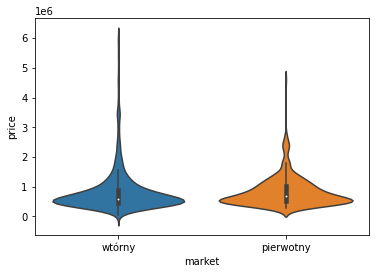

In [38]:
sns.violinplot(data=df, x='market', y='price')
plt.show()

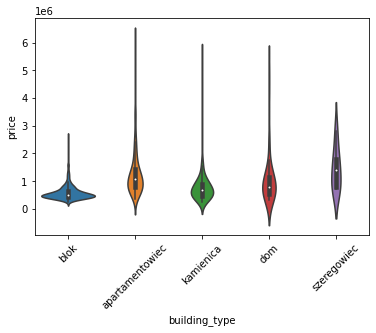

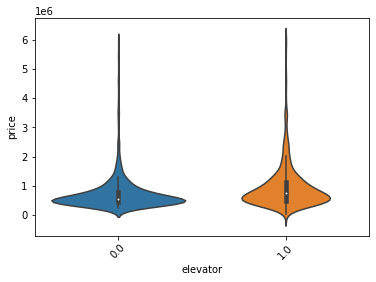

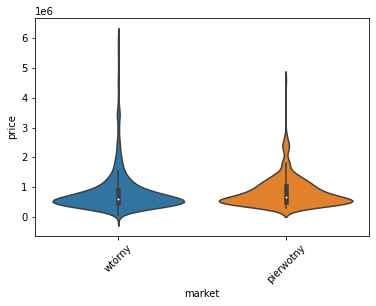

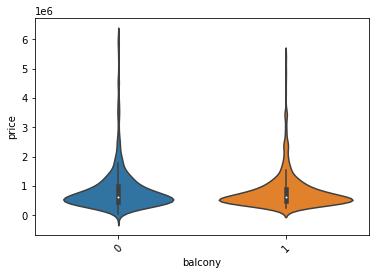

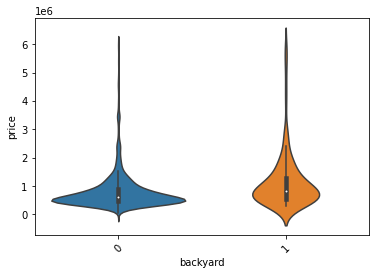

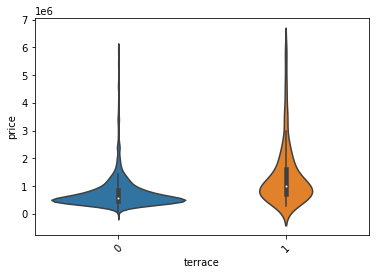

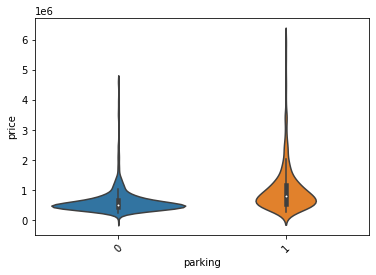

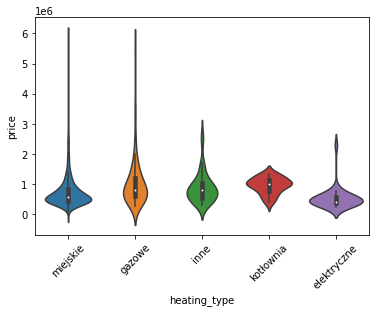

In [39]:
perks = ['building_type', 'elevator', 'market', 'balcony', 'backyard', 'terrace', 'parking', 'heating_type']
for perk in perks:
    sns.violinplot(data=df, x=perk, y='price')
    plt.xticks(rotation=45)
    plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        1750 non-null   object 
 1   price          1753 non-null   float64
 2   price_m2       1753 non-null   float64
 3   area_m2        1753 non-null   float64
 4   rooms          1751 non-null   float64
 5   floor          1737 non-null   float64
 6   parking        1753 non-null   int64  
 7   market         1753 non-null   object 
 8   build_yr       1517 non-null   float64
 9   building_type  1346 non-null   object 
 10  elevator       1753 non-null   float64
 11  heating_type   1283 non-null   object 
 12  max_floor      1704 non-null   float64
 13  balcony        1753 non-null   int64  
 14  backyard       1753 non-null   int64  
 15  terrace        1753 non-null   int64  
 16  building_age   1517 non-null   float64
 17  district       1682 non-null   object 
 18  street  

Features canidates:

area_m2, rooms, district, build_yr, market, parking, terrace, building_type 

In [41]:
df.to_csv('../data/interim/otodom_eda.csv')